# HOTEL BOOKING PROPOSAL

This dataset contain information of hotel booking, We will perform exploratory data analysis to get insight from the data.
We will try to answer the following Questions
1. How Many Booking Were Cancelled?
2. What is the booking ratio between Resort Hotel and City Hotel?
3. From which country most guest come?
4. Which was the most booked accommodation type (Single, Couple, Family)?


After that we will make predictive model to predict whether the booking will be cancelled or not using :
  - RandomForestClassifier 
  - k-means clustering


Part#1:Explotary Data Analysis

Imports all needed libraries, we make aliases for easier calling when needed:

In [46]:
# Import all libraries needed in analysis
import pandas as pd # data processing, CSV file - Dataframe
import numpy as np # linear algebra - Arraies
import matplotlib.pyplot as plt # plotting - Visualization 
import seaborn as sns # Visualization 
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn import metrics

%matplotlib inline

# 1.Data preparation

In These Step ,prepare dataset involves:

    - Collect Dataset,This is a critical first step that involves gathering data.
    - Preprocess && clean Data Set,The three common steps for preprocessing data are formatting, 
    cleaning,and sampling.
    - Transform DataSet,The data can be transformed through scaling, decomposition, or aggregation.



In [2]:
# Load dataset anto a dataframe
HBooking=pd.read_csv("hotel_bookings.csv") 


In [3]:
HBooking.index #shows the index of data

RangeIndex(start=0, stop=119390, step=1)

In [4]:
HBooking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [5]:
HBooking.tail() # Shows the last 5 rows of data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,9/7/2017


In [6]:
HBooking.info() #Exploring general properties about the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
HBooking.isna().sum()  #Finding the number of missing values in every column

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Outcomes:

- This shows that we have 32 columns in total besides index, and we have 119390 record.
- These dataSet fields have NULL values:(children ,country,agent ) ,So we supposed to fill null data       
- Datatype should be changed for "reservation_status_date".
- “arrival_date_week_number” column is of no use as we already have 3 columns of the year, month, and the day giving us the date of arrival.
- Also as we have created a new column showing the date, we no more need the 3 individual columns. Hence let us remove these columns
-  children,Company are float64 while it supposed to be an int.

In [8]:
#create new column that combines three columns:month,year,date 

HBooking['arival_date']= pd.to_datetime( HBooking.arrival_date_year.astype(str)+'/'+HBooking.arrival_date_month.astype(str)+'/'+HBooking.arrival_date_day_of_month.astype(str))
# drop day,week,month and week column after create new column 

HBooking.drop(columns=['arrival_date_year','arrival_date_month','arrival_date_day_of_month','arrival_date_week_number'],inplace=True,axis=1)


In [9]:
## Remove reservation_status column
## because it tells us if booking was cancelled and there's other column is_cancelled it tell us if reservation were cancelled or not
HBooking.drop(['reservation_status'], axis=1)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arival_date
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,7/1/2015,2015-07-01
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,7/1/2015,2015-07-01
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,7/2/2015,2015-07-01
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,7/2/2015,2015-07-01
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,7/3/2015,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,2,0.0,0,BB,BEL,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,9/6/2017,2017-08-30
119386,City Hotel,0,102,2,5,3,0.0,0,BB,FRA,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,9/7/2017,2017-08-31
119387,City Hotel,0,34,2,5,2,0.0,0,BB,DEU,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,9/7/2017,2017-08-31
119388,City Hotel,0,109,2,5,2,0.0,0,BB,GBR,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,9/7/2017,2017-08-31


Removing the unwanted columns
Usually, if more than 70% of values in a column are missing and there is no way to fill in the missing values, then the column can be dropped completely from the dataset.

In [10]:
for col in HBooking.columns:
    if np.sum(HBooking[col].isnull())>(HBooking.shape[0]*0.7):
        HBooking.drop(columns=col,inplace=True,axis=1)
print(HBooking.shape)

(119390, 28)


 Removing unwanted rows
Depending upon what values we are predicting, we can either remove the entire agent id column or remove the row having empty values.
As I have already shown how to remove a column, let us remove all rows having a missing value in the agent column

In [11]:
HBooking.columns  # dropped company column

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arival_date'],
      dtype='object')

In [12]:
HBooking.dropna(subset=['agent'],inplace=True)

In [13]:
#Fill in the missing children values with the mean() 
# As mean can be of float datatype, I have taken the lowest nearest integer using the floor method
children_mean = HBooking['children'].mean()
HBooking.children.fillna(children_mean, inplace=True)
HBooking['children']=HBooking['children'].apply(np.floor)

In [14]:
#Fill in the missing children values with the country() 

HBooking.country.fillna(method='pad', inplace=True)

In [15]:
HBooking.isna().sum()  #or .sum(axis=1) to sum across rows

hotel                             0
is_canceled                       0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
arival_date                 

In [16]:
HBooking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103050 entries, 3 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           103050 non-null  object        
 1   is_canceled                     103050 non-null  int64         
 2   lead_time                       103050 non-null  int64         
 3   stays_in_weekend_nights         103050 non-null  int64         
 4   stays_in_week_nights            103050 non-null  int64         
 5   adults                          103050 non-null  int64         
 6   children                        103050 non-null  float64       
 7   babies                          103050 non-null  int64         
 8   meal                            103050 non-null  object        
 9   country                         103050 non-null  object        
 10  market_segment                  103050 non-null  object 

In [17]:
#convert Datatype to Int
HBooking['children'] = HBooking['children'].astype('int')


In [18]:
#convert Datatype of “reservation_status_date” to Datetime
HBooking["reservation_status_date"] = pd.to_datetime(HBooking["reservation_status_date"])

In [19]:
HBooking.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int32
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes                            int64
deposit_type                              object
agent                                    float64
days_in_waiting_list

In [20]:
HBooking=HBooking.rename(columns={"adr":"average daily rate"}) # Rename column to give positive meaning.

In [21]:
#check column name 
HBooking.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'average daily rate',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arival_date'],
      dtype='object')

In [22]:
#Check Duplicates
HBooking.duplicated().sum()

27858

In [23]:
#Remove Dublicate Data
HBooking = HBooking.drop_duplicates(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'average daily rate',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arival_date'], keep='last')

In [24]:
#Check After remove Duplicates
HBooking.duplicated().sum()

0

In [25]:
#checking how many index after clean data
HBooking.index 

Int64Index([     3,      5,      7,      8,      9,     10,     11,     12,
                13,     14,
            ...
            119380, 119381, 119382, 119383, 119384, 119385, 119386, 119387,
            119388, 119389],
           dtype='int64', length=75192)

In [26]:
HBooking.describe() # Get statistical data about each column

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,average daily rate,required_car_parking_spaces,total_of_special_requests
count,75192.000000,75192.000000,75192.000000,75192.000000,75192.000000,75192.000000,75192.000000,75192.000000,75192.000000,75192.000000,75192.000000,75192.000000,75192.000000,75192.000000,75192.000000,75192.000000
mean,0.298795,86.841446,1.069662,2.749973,1.923941,0.148766,0.010493,0.014616,0.019683,0.033567,0.248125,94.126317,0.808969,110.129003,0.072388,0.739321
std,0.457733,85.953479,1.032547,2.042589,0.519288,0.471303,0.113271,0.120010,0.315970,0.510001,0.697908,113.179702,10.565437,54.402775,0.260615,0.832483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,75.950000,0.000000,0.000000
50%,0.000000,59.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,101.500000,0.000000,1.000000
75%,1.000000,134.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,136.800000,0.000000,1.000000
max,1.000000,629.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000


In [27]:
HBooking.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int32
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes                            int64
deposit_type                              object
agent                                    float64
days_in_waiting_list

In [32]:
df_not_canceled = HBooking[HBooking['is_canceled'] == 0]
df_not_canceled.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'average daily rate',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arival_date'],
      dtype='object')

# Let's try to answer our questions
1. How Many Booking Were Cancelled

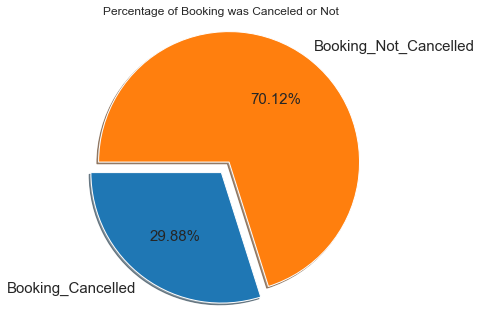

In [31]:
BookingCancelled = HBooking[HBooking["is_canceled"]==1].count()["is_canceled"] # Count of  Booking canceled 
BookingNotCancelled= HBooking[HBooking["is_canceled"]==0].count()["is_canceled"] #Count of  Booking Not canceled 

label_Names = ["Booking_Cancelled", "Booking_Not_Cancelled"]
data = [BookingCancelled, BookingNotCancelled]

explode = (0, 0.15) # Only explode the didn't show up slice.
plt.axis('equal'); # To keep aspect ratio equal to appear as a fine circle.

plt.pie(data,radius=1.5,shadow=True ,labels = label_Names,explode=explode, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":15})

plt.title("Percentage of Booking was Canceled or Not",y=1.2);
# Autopct to show percentage, 0.2 for two decimal place


Answer:
    Percentage of Booking was canceled represents 29.88%
    Percentage of Booking Not canceled represents 70.12%



2.What is the booking ratio between Resort Hotel and City Hotel?


In [33]:
h1=df_not_canceled['hotel'].value_counts()
h1

City Hotel      32621
Resort Hotel    20104
Name: hotel, dtype: int64

([<matplotlib.patches.Wedge at 0x2541682fc40>,
 [Text(0.6011388369198248, -1.5365975721530607, 'City Hotel'),
  Text(-0.6557878220943557, 1.676288260530611, 'Resort Hotel')],
 [Text(0.32789391104717713, -0.8381441302653057, '61.87%'),
  Text(-0.38254289622170745, 0.9778348186428564, '38.13%')])

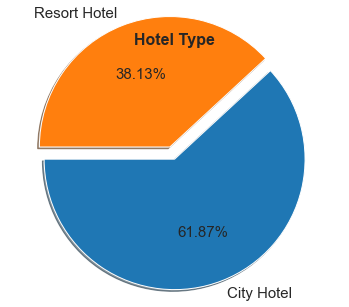

In [35]:
ycolors = ["r", "c"]
names= ['City Hotel','Resort Hotel']
plt.title('Hotel Type', fontdict = {'fontsize': 16},weight = 'bold')

explode = (0, 0.15) # Only explode the didn't show up slice.
plt.axis('equal'); # To keep aspect ratio equal to appear as a fine circle.

plt.pie(h1,radius=1.5,shadow=True ,labels = names,explode=explode, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":15})


         

3. From which country most guest come?


In [36]:
country=df_not_canceled['country'].value_counts()
country

PRT    11341
GBR     7607
FRA     6611
ESP     4862
DEU     4103
       ...  
MKD        1
BHR        1
NPL        1
SYC        1
FRO        1
Name: country, Length: 162, dtype: int64

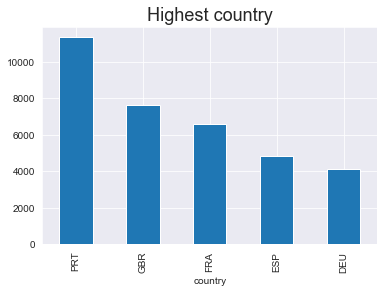

In [37]:
df_not_canceled['country'].value_counts().head().plot(kind='bar');

plt.xlabel('country')
plt.title('Highest country', fontdict = {'fontsize': 18});

Answer :
- The most guest come from PRT(portugal) country

4.Which was the most reserved_room_type?


In [41]:
df_not_canceled['reserved_room_type'].unique()


array(['A Single room', 'Joint room', 'Cabana', 'Deluxe room',
       'Triple room', 'Connecting room', 'Penthouse', 'Suite'],
      dtype=object)

In [39]:
#rename values 
df_not_canceled['reserved_room_type'].replace({'A':'A Single room','B':'Suite',
                         'C':'Joint room','D':'Cabana',
                         'E':'Triple room','F':'Connecting room',
                         'G':'Deluxe room','H':'Penthouse',
                         'P':'Accessible room','L':'Apartment-style'},inplace=True)


df_not_canceled

C:\Users\SDAIA\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,average daily rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arival_date
3,Resort Hotel,0,13,0,1,1,0,0,BB,GBR,...,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
5,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,...,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
7,Resort Hotel,0,9,0,2,2,0,0,FB,PRT,...,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07-01
11,Resort Hotel,0,35,0,4,2,0,0,HB,PRT,...,No Deposit,240.0,0,Transient,145.00,0,0,Check-Out,2015-07-05,2015-07-01
12,Resort Hotel,0,68,0,4,2,0,0,BB,USA,...,No Deposit,240.0,0,Transient,97.00,0,3,Check-Out,2015-07-05,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,2,0,0,BB,BEL,...,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,0,102,2,5,3,0,0,BB,FRA,...,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,0,34,2,5,2,0,0,BB,DEU,...,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,0,109,2,5,2,0,0,BB,GBR,...,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


In [42]:
room=df_not_canceled['reserved_room_type'].value_counts()
room

A Single room      34113
Cabana             10922
Triple room         3577
Connecting room     1666
Deluxe room         1075
Suite                593
Joint room           487
Penthouse            292
Name: reserved_room_type, dtype: int64

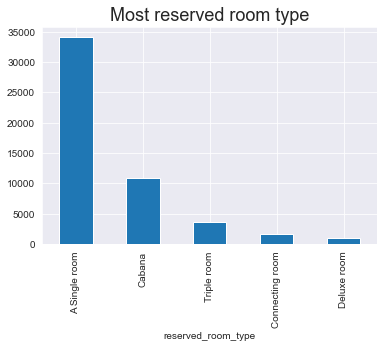

In [48]:
df_not_canceled['reserved_room_type'].value_counts().head().plot(kind='bar');

plt.xlabel('reserved_room_type')
plt.title('Most reserved room type', fontdict = {'fontsize': 18});


Answer: 
- The most Most reserved room type is .

# feature Selection 

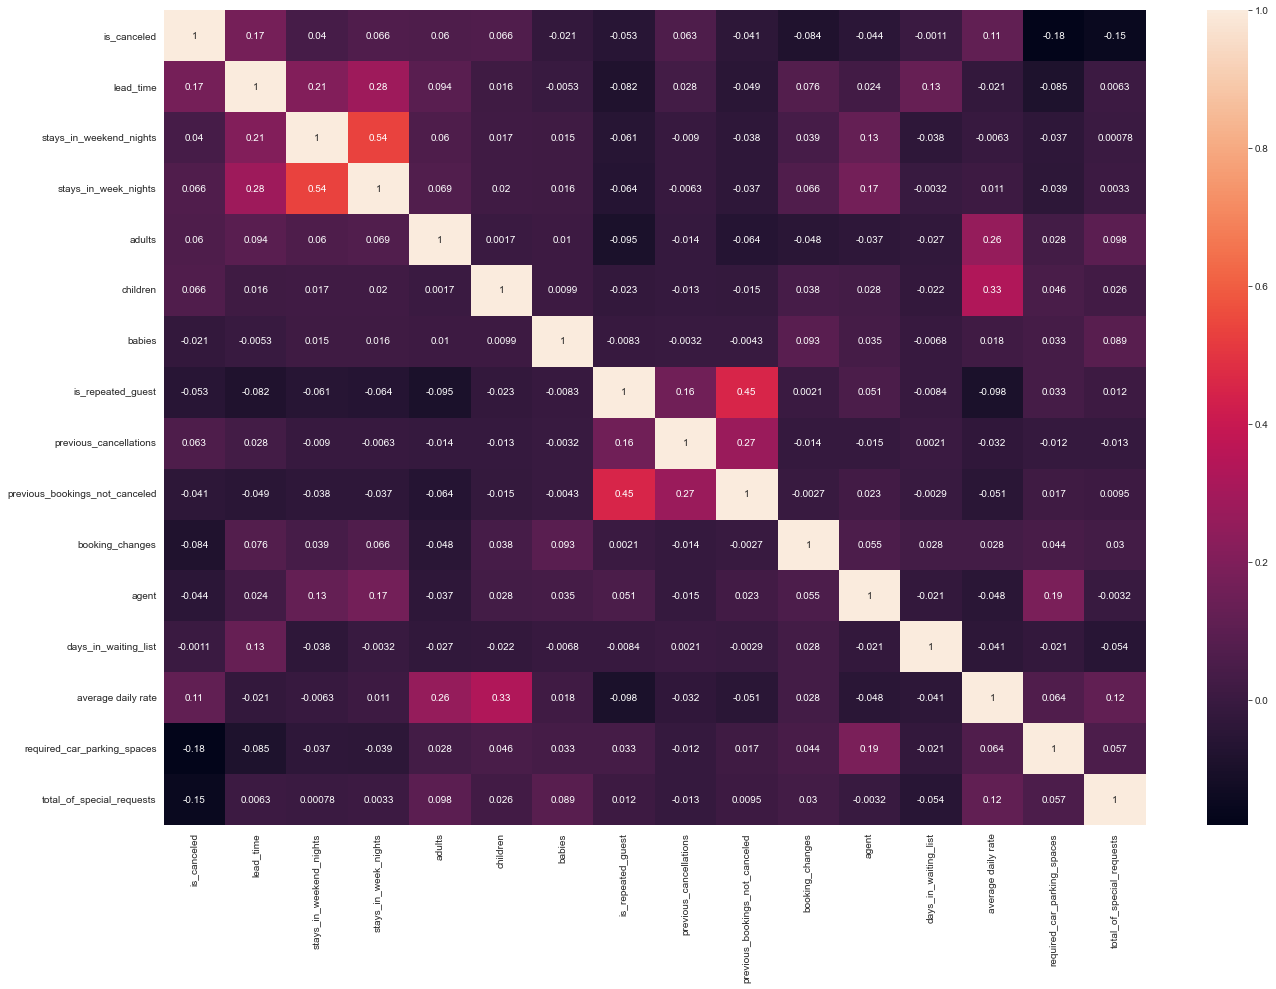

In [39]:
## Plot the heatmap to see correlation with columns 
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(HBooking.corr(), annot=True, ax=ax);
#X = HBooking[['lead_time','stays_in_week_nights','adults', 'children','previous_cancellations','average daily rate']]

# Train Test Split
#Rndom Fore


In [41]:
HBooking.drop(['reservation_status_date','arival_date'],inplace=True,axis=1)


In [47]:
X = HBooking[['lead_time','stays_in_week_nights','stays_in_weekend_nights','is_repeated_guest','previous_bookings_not_canceled','required_car_parking_spaces','total_of_special_requests','adults', 'children','previous_cancellations','average daily rate']]

In [48]:

y_var = HBooking['is_canceled']


In [49]:
x_train, x_test, y_train, y_test = train_test_split(X,y_var, test_size = 0.3, random_state = 42)


In [50]:
rf = RandomForestClassifier()


In [51]:
rf.fit(x_train,y_train)


RandomForestClassifier()

In [52]:
y_pred_rf = rf.predict(x_test)


In [53]:
score = metrics.accuracy_score(y_test,y_pred_rf)
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(score))

Accuracy of Random Forest Classifier on test set: 0.73


In [54]:
confusion_matrix = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix)

[[13631  2120]
 [ 3881  2926]]


In [55]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82     15751
           1       0.58      0.43      0.49      6807

    accuracy                           0.73     22558
   macro avg       0.68      0.65      0.66     22558
weighted avg       0.72      0.73      0.72     22558



In [79]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# neigh = NearestNeighbors()

neigh = KNeighborsClassifier()

pred = neigh.fit(x_train, y_train)
y_test_pred = pred.predict(x_test)

print(accuracy_score(y_test, y_test_pred))


0.6764340810355528


Thank you 